# 绘制细胞群相关性热图
- **Log**
  - 0905

In [5]:
library(ComplexHeatmap)
library(ggplot2)

In [20]:
mat <- as.matrix(read.csv("/data/users/yangdong/yangdong_8632f88957bb4c4f85daf59edaf6b059/online/test/MetaNeighbor/output/maize_metaNeighbor.csv",
                          header = TRUE,   # 若首行不是列名
                          row.names = 1, # 不拿任何列当行名
                          check.names = FALSE))
mode(mat)        # "numeric"
class(mat)       # "matrix"

[1] "numeric"

[1] "matrix" "array"

In [21]:
head(mat)

,L3|0,L3|1,L3|10,L3|11,L3|12,L3|13,L3|14,L3|15,L3|16,L3|2,⋯,L4|14,L4|15,L4|16,L4|2,L4|3,L4|4,L4|5,L4|6,L4|8,L4|9
L3|0,0.9506387,0.2393233,0.3918804,0.7560625,0.5289093,0.7760472,0.6049831,0.6464242,0.6098998,0.1087910,⋯,0.6123379,0.6636972,0.6310756,0.1330240,0.8253942,0.6321332,0.7563986,0.3910919,0.5887727,0.8070317
L3|1,0.2393233,0.9518049,0.6941468,0.2026859,0.2312727,0.2791978,0.2131569,0.5883293,0.2608488,0.5474319,⋯,0.2057426,0.7331390,0.2358149,0.5526755,0.4271640,0.2564444,0.3321348,0.8512157,0.5045572,0.2425205
L3|10,0.3918804,0.6941468,0.9621862,0.4397442,0.5083972,0.2101867,0.4940647,0.7900595,0.4937993,0.5928241,⋯,0.5023502,0.7678869,0.4253241,0.5620658,0.5591489,0.5774797,0.8349483,0.5397999,0.7627085,0.4313844
L3|11,0.7560625,0.2026859,0.4397442,0.9567297,0.6697631,0.8507578,0.7657344,0.4572125,0.7336746,0.3402497,⋯,0.7402561,0.5045070,0.7463442,0.2865486,0.7457892,0.6911556,0.7472869,0.3319339,0.6954957,0.9234704
L3|12,0.5289093,0.2312727,0.5083972,0.6697631,0.9671401,0.6145656,0.8911881,0.5770112,0.8726098,0.4708400,⋯,0.8664348,0.3868583,0.8237082,0.4439217,0.4640725,0.9309233,0.7374830,0.2621658,0.4975331,0.6622380
L3|13,0.7760472,0.2791978,0.2101867,0.8507578,0.6145656,0.9703011,0.7281598,0.3246773,0.6837752,0.2421900,⋯,0.7155560,0.4338504,0.7725083,0.1903295,0.8267704,0.6243150,0.8052828,0.4392977,0.5251316,0.8720688


In [22]:
cols = rev(colorRampPalette(RColorBrewer::brewer.pal(11,"RdYlBu"))(100))
breaks = seq(0, 1, length=101)

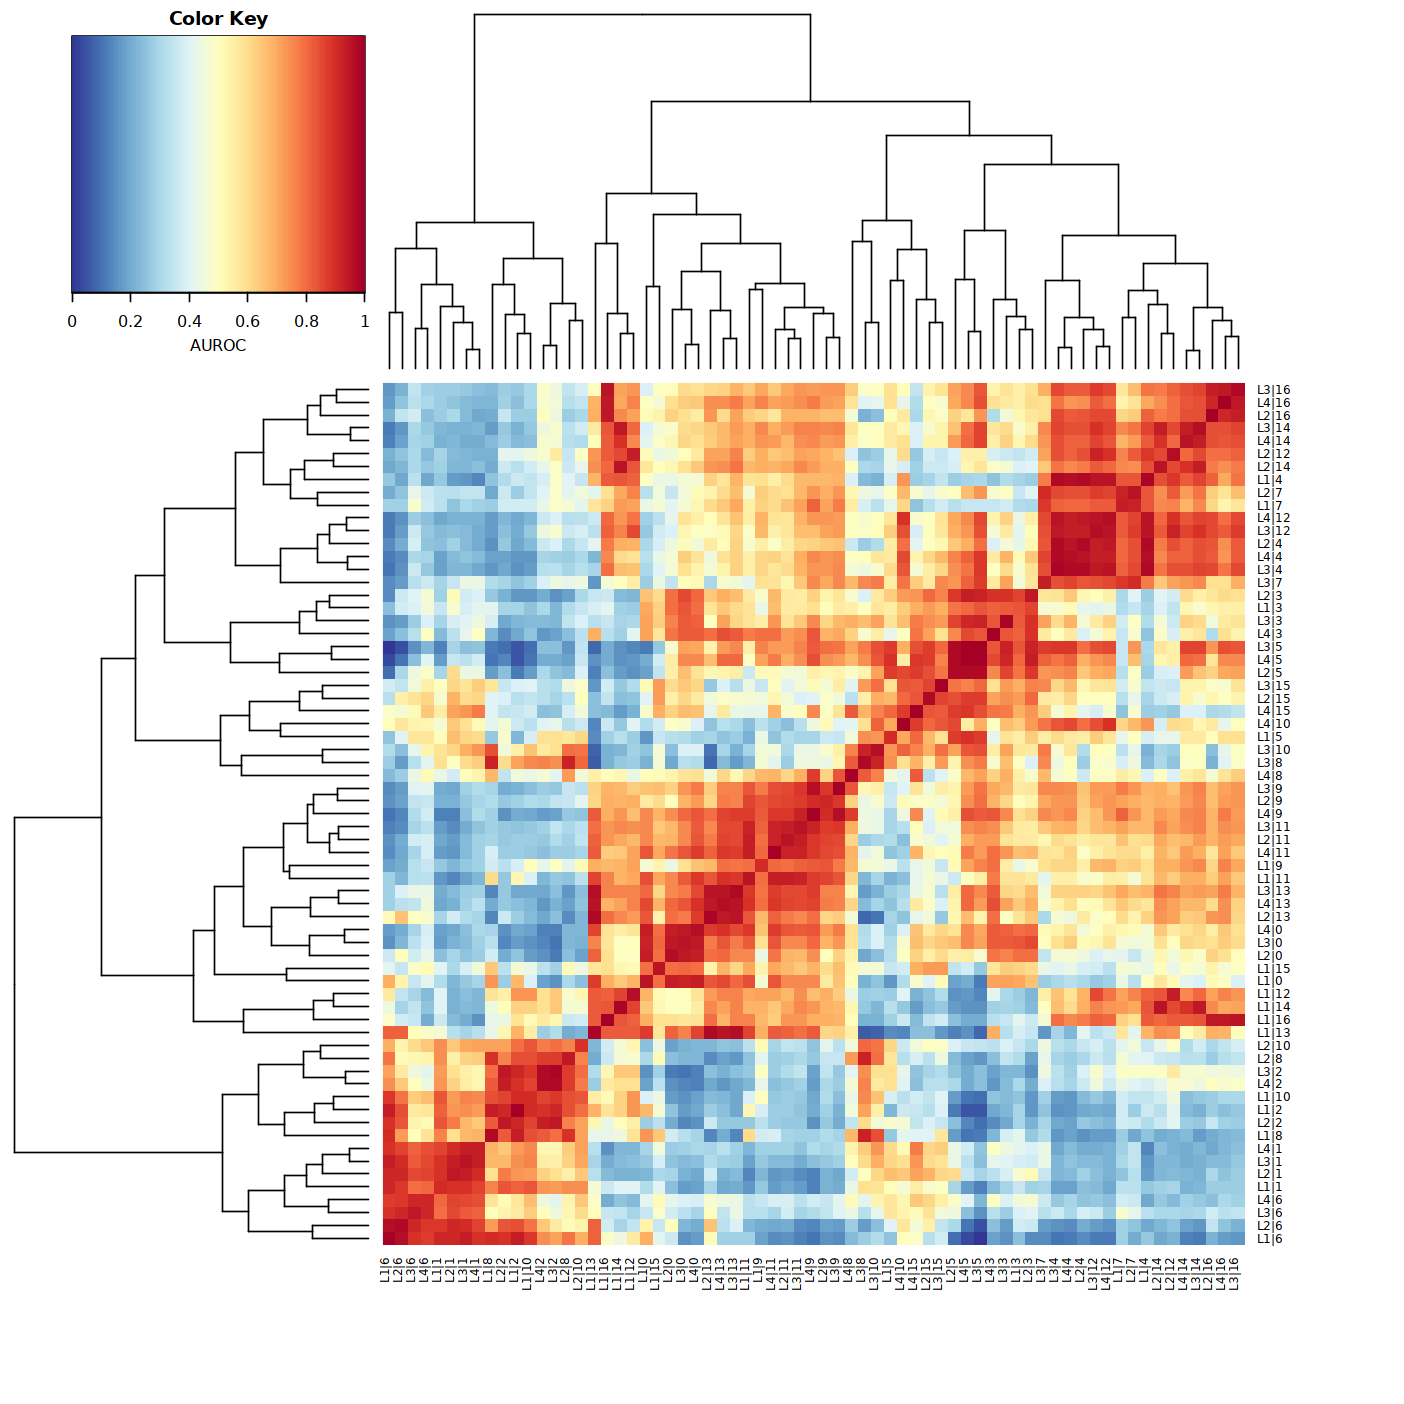

In [33]:
options(repr.plot.width = 5+0.1*length(rownames(mat)), repr.plot.height = 5+0.1*length(rownames(mat)))
# Using heatmap do heatmap
gplots::heatmap.2(mat,
                  col = cols,
                  breaks = breaks,
                  key.xlab = "AUROC",
                  margins = c(8, 8),
                  trace = "none",
                  density.info = "none",
                  offsetRow=0.1,
                  offsetCol=0.1,
                  cexRow = 0.7,
                  cexCol = 0.7)

In [26]:
library(ambient)
library(grid)
library(ggcor)

Registered S3 methods overwritten by 'ggcor':
  method from     
  &.gg   patchwork
  *.gg   patchwork


********************************************************

Note: As of version 0.9.8, ggcor does not change the

  default ggplot2 continuous fill scale anymore. To

  recover the previous behavior, execute:

    set_scale()


  Instead of using the set_scale() function, we

  recommend adding the 'scale_fill_*()' function

  to the plot as needed.

********************************************************



Attaching package: ‘ggcor’


The following objects are masked from ‘package:ComplexHeatmap’:

    anno_boxplot, anno_link


The following object is masked from ‘package:stats’:

    filter




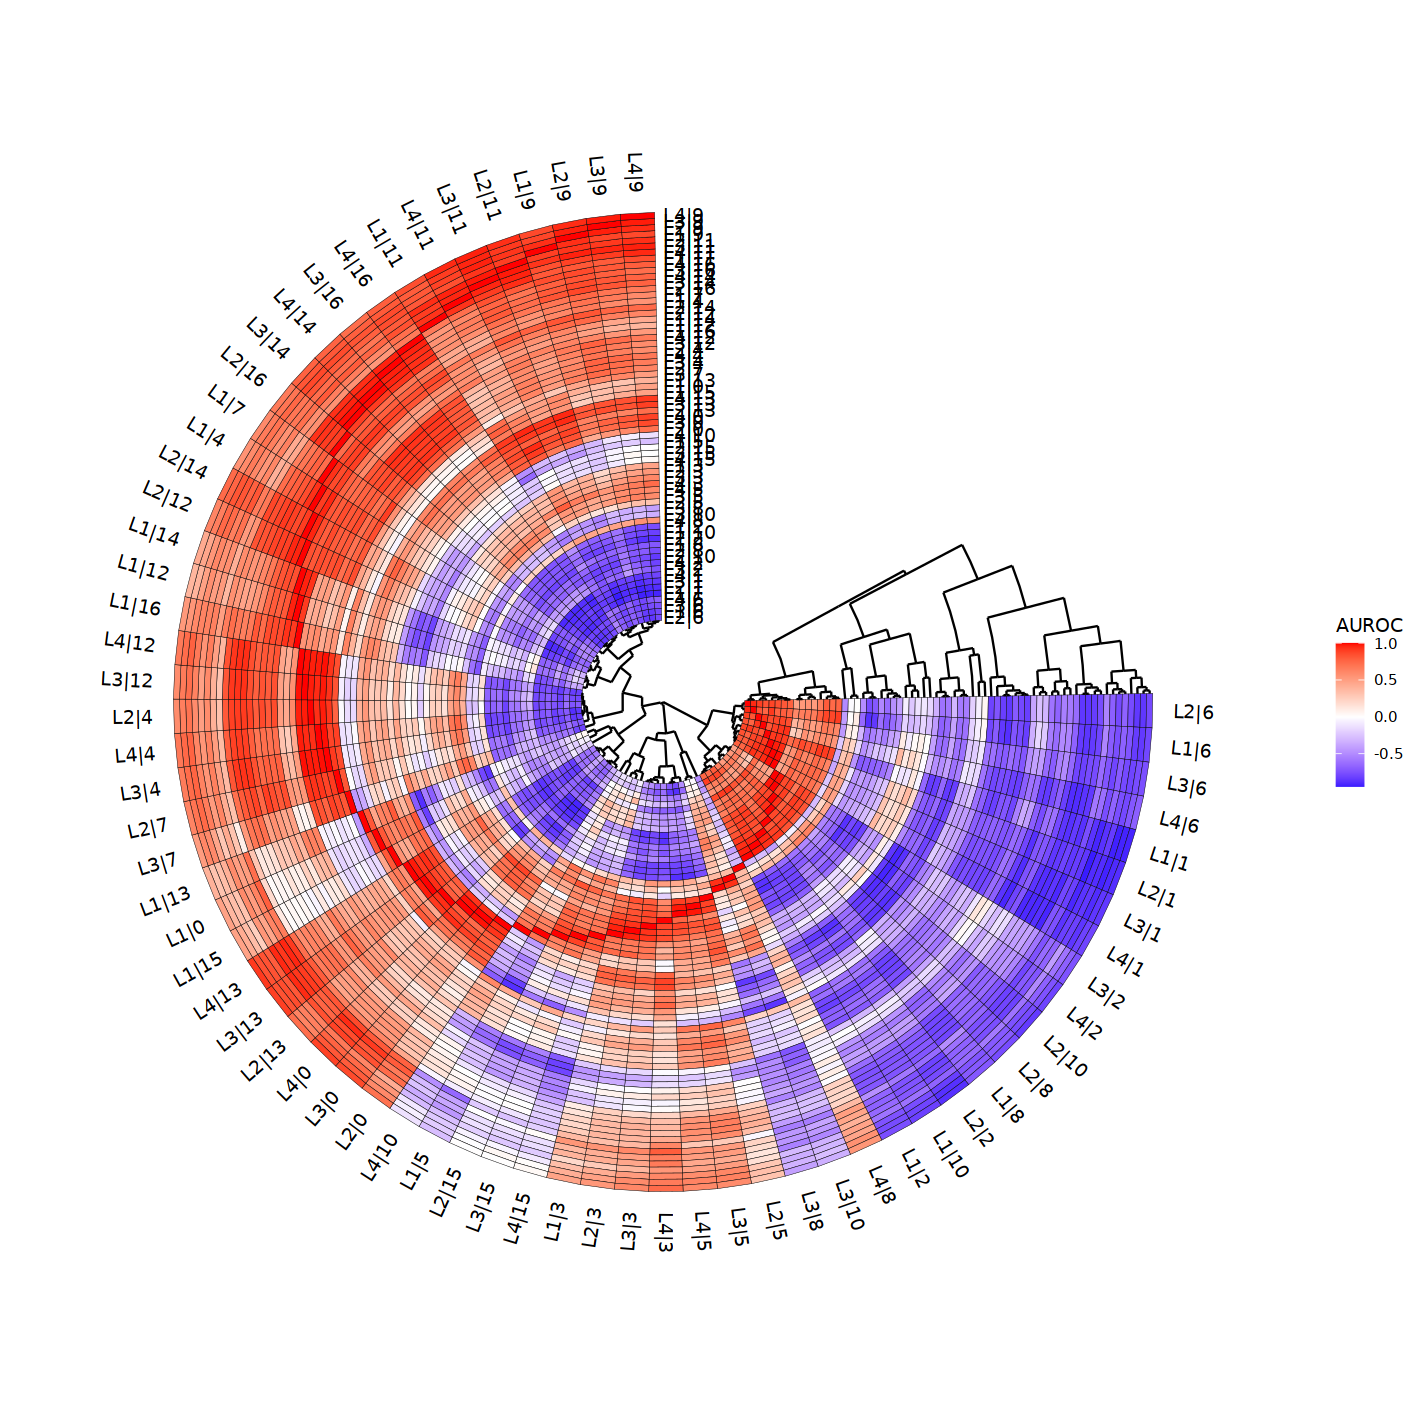

In [34]:
# Using ggcor do circle heatmap
p1 <- quickcor(mat, circular = TRUE, cluster = TRUE, grid.colour = 'white',
         open = 90, # 缺口大小
         # 内圈外圈比例
         outer = 0.1, inner = 0.2) +
  # 单元格边框线颜色
  geom_colour(colour = 'black') +
  # 自定义填充颜色
  scale_fill_gradient2(low = 'blue', mid = 'white', high = 'red') +
  # 更改图例名称
  guides(fill = guide_colorbar(title = 'AUROC')) +
  anno_col_tree() +
  anno_row_tree() +
  # 基因名
  set_p_yaxis() +
  # 样本名
  set_p_xaxis()
p1

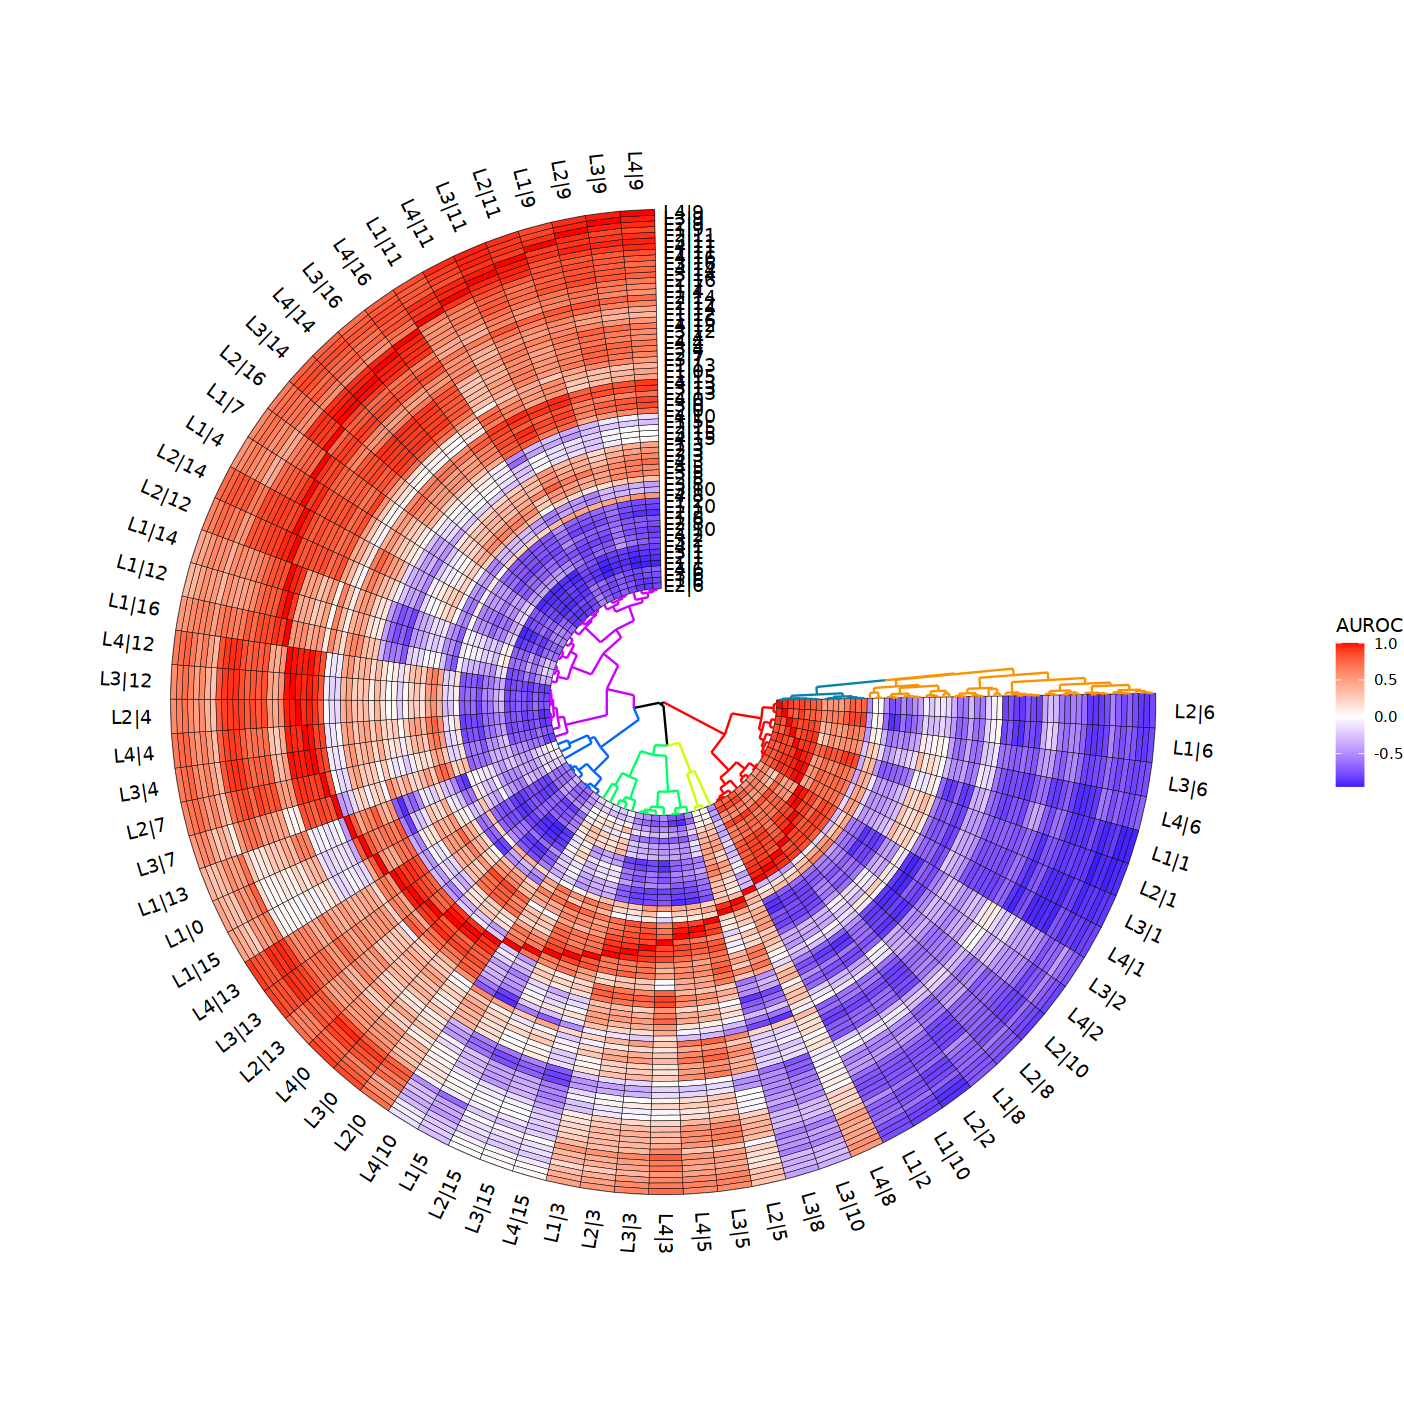

In [35]:
p2 <- quickcor(mat, circular = TRUE, cluster = TRUE,
         open = 90, # 缺口大小
         # 内圈外圈比例
         outer = 0.1, inner = 0.3) +
  # 单元格边框线颜色
  geom_colour(colour = 'black') +
  # 自定义填充颜色
  scale_fill_gradient2(low = 'blue', mid = 'white', high = 'red') +
  # 更改图例名称
  guides(fill = guide_colorbar(title = 'AUROC')) +
  # 添加聚类树
  anno_col_tree(height = 0.05, bcols = c('#0A81AB','#FB9300')) +
  anno_row_tree(pos = 'left', bcols = rainbow(5)) +
  # 基因名
  set_p_yaxis() +
  # 样本名
  set_p_xaxis()
p2

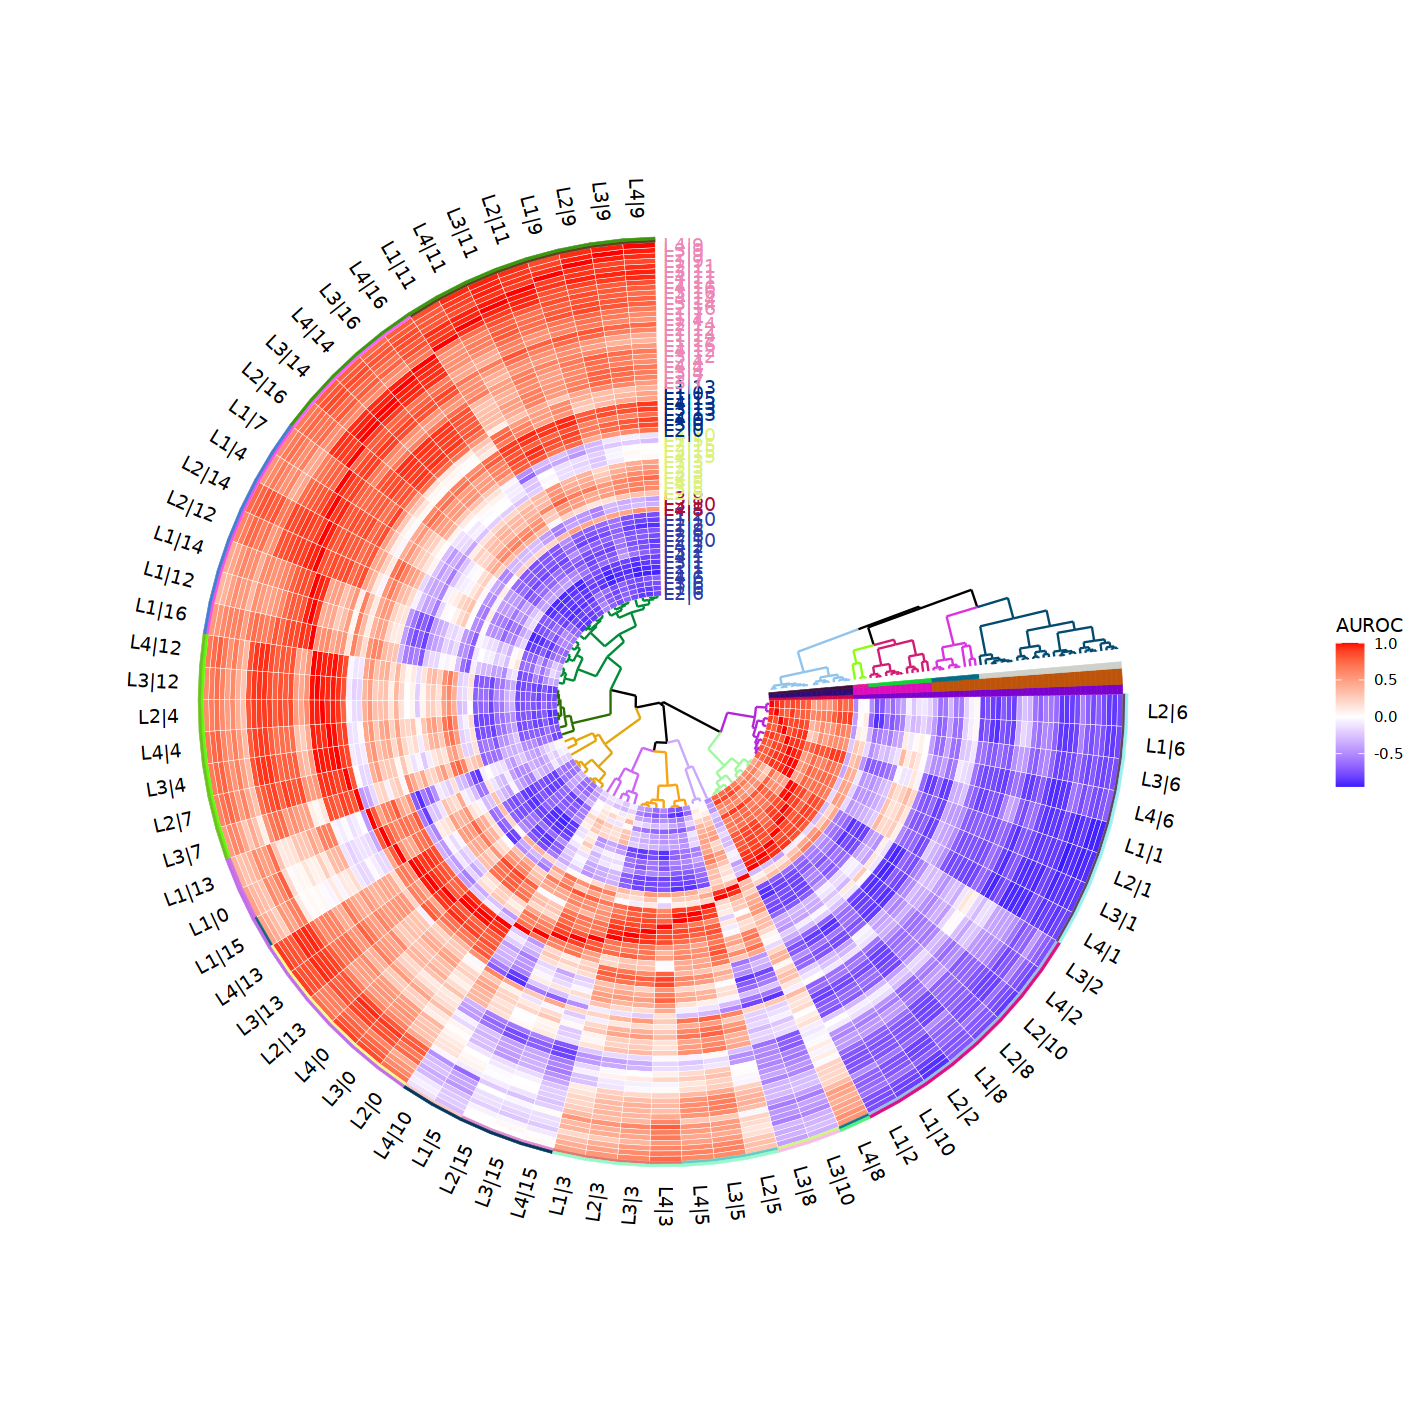

In [36]:
p3 <- quickcor(mat, circular = TRUE, cluster = TRUE, grid.colour = 'white',
         open = 90, # 缺口大小
         # 内圈外圈比例
         outer = 0.2, inner = 0.3) +
  # 单元格边框线颜色
  geom_colour(colour = 'white') +
  # 自定义填充颜色
  scale_fill_gradient2(low = 'blue', mid = 'white', high = 'red') +
  # 更改图例名称
  guides(fill = guide_colorbar(title = 'AUROC')) +
  # 列注释
  anno_hc_bar(k = 2, fill = rand_color(2), pos = 'top', height = 0.3) +
  anno_hc_bar(k = 3, fill = rand_color(3), pos = 'top', height = 0.5) +
  anno_hc_bar(k = 5, fill = rand_color(5), pos = 'top', height = 0.2) +
  # 添加聚类树
  anno_col_tree(bcols = rand_color(5), height = 0.15) +
  anno_hc_bar(k = 15, fill = rand_color(15), pos = 'left', width = 0.5) +
  anno_hc_bar(k = 10, fill = rand_color(10), pos = 'left', width = 0.5) +
  anno_row_tree(bcols = rand_color(8)) +

  # 样本名
  set_p_xaxis(bcols = rand_color(5)) +
  # 基因名
  set_p_yaxis()
p3